# Quantum Optics with Qutip:
## Atom-field interaction - with and without rotating wave approximation

Author's infomation: 

* Siwei Wang @ IAMS-Sinica, Taipei
* Email: wswrpd@gmail.com

### Hamailtonian with and without rotating wave approximation
In this notebook, the quantum Rabi Hamiltonian describes the interaction of a single two-level atom with a single-mode field without using the rotating wave approximation (RWA):
\begin{align}
    \hat{H}_\mathrm{Rabi} = \hbar\omega_c \hat{a}^\dagger\hat{a} + \frac{\hbar\omega_a}{2}\hat{\sigma}_\mathrm{z} + \hbar g \left(\hat{\sigma}_+\hat{a} + \hat{\sigma}_-\hat{a}^\dagger + \hat{\sigma}_+\hat{a}^\dagger + \hat{\sigma}_-\hat{a} \right)
\end{align}
where $\hat{a}^\dagger$ and $\hat{a}$ are the bosonic creation and annihilation operator, respectively.  $\hat{\sigma}_+$ and $\hat{\sigma}_-$ are ladder operators in the $\hat{\sigma}_\mathrm{z}$ representation, and $\hat{\sigma}_+=|\mathrm{e}\rangle\langle \mathrm{g}|$, $\hat{\sigma}_-=|\mathrm{g}\rangle\langle \mathrm{e}|$.

RWA is that we drop the "counter-rotating" terms $\hat{\sigma}_+\hat{a}^\dagger$ and $\hat{\sigma}_-\hat{a}$ in the quantum Rabi Hamiltonian. The corresponding Hamiltonian after the RWA is the Jaynes-Cummings Hamiltonian,
\begin{align}
    \hat{H}_\mathrm{JC} = \hbar\omega_c \hat{a}^\dagger\hat{a} + \frac{\hbar\omega_a}{2}\hat{\sigma}_\mathrm{z} + \hbar g \left(\hat{\sigma}_+\hat{a} + \hat{\sigma}_-\hat{a}^\dagger \right)
\end{align}

### Quantum Rabi model in weak coupling regime

The weak coupling regime is defined as $(\omega_c + \omega_g)\gg g \,\mathrm{and}\, |\omega_c - \omega_g|$. 
The intial state is $|\psi(0)\rangle = |\mathrm{e},0\rangle$. The excited state and ground state popultion of the atom are plotted.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
#import neccessary packages

Text(0.5, 1.0, 'Population Dynamics without RWA (on-resonance)')

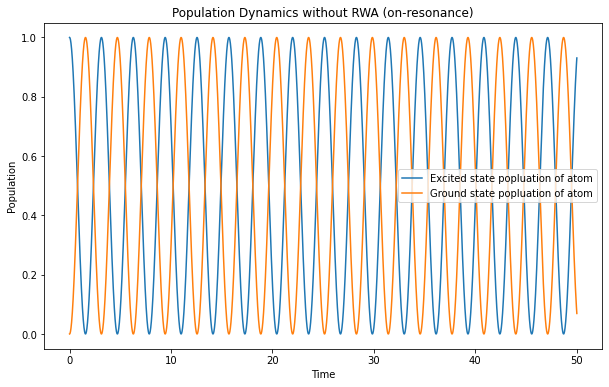

In [2]:
wc = 1.0 * 2 * np.pi
wa = 1.0 * 2 * np.pi
g = 0.01 * 2 * np.pi
N = 100
step = 5001

a = tensor(destroy(N),qeye(2))
Sigz = tensor(qeye(N),sigmaz())
Sigp = tensor(qeye(N),destroy(2))
Sigm = tensor(qeye(N),create(2))

H_Rabi = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp + a.dag() * Sigp + a * Sigm)

t_list = np.linspace(0,50.0/(g),step)    

psi0 = tensor(fock(N,0),basis(2,0))  # the initial state is a vacuum state of photon.

Exc_atom = tensor(qeye(N),fock_dm(2,0))
Grd_atom = tensor(qeye(N),fock_dm(2,1))

result0 = mesolve(H_Rabi,psi0,t_list,[],[Exc_atom, Grd_atom])

n_Exc = result0.expect[0]
n_Grd = result0.expect[1]

fig,axes = plt.subplots(1,1,figsize = (10,6))
axes.plot(t_list*g,n_Exc,label = 'Excited state popluation of atom')
axes.plot(t_list*g,n_Grd,label = 'Ground state popluation of atom')

axes.legend(loc = 'best')
axes.set_xlabel('Time')
axes.set_ylabel('Population')
axes.set_title('Population Dynamics without RWA (on-resonance)')

### Slightly off-resonance in the weak coupling regime
When $\omega_c \neq \omega_a$ and $|\psi(0)\rangle = |\mathrm{e},0\rangle$., we find the excited state population can not drop to zero during the Rabi oscillation cycle, and the ground state population can not reach one during the Rabi oscillation cycle.

Text(0.5, 1.0, 'Population Dynamics without RWA (off-resonance)')

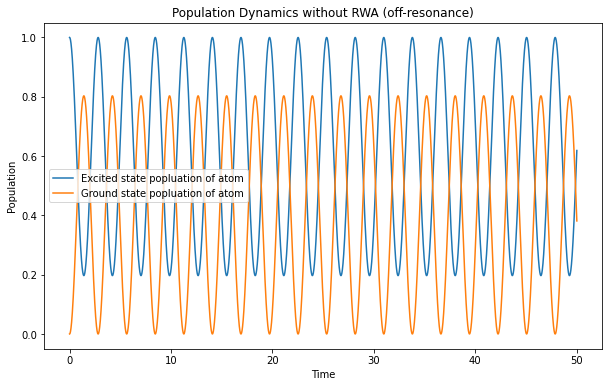

In [3]:
wc = 1.0 * 2 * np.pi
wa = 0.99 * 2 * np.pi
g = 0.01 * 2 * np.pi
N = 100
step = 5001

a = tensor(destroy(N),qeye(2))
Sigz = tensor(qeye(N),sigmaz())
Sigp = tensor(qeye(N),destroy(2))
Sigm = tensor(qeye(N),create(2))

H_Rabi = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp + a.dag() * Sigp + a * Sigm)

t_list = np.linspace(0,50.0/(g),step)    

psi0 = tensor(fock(N,0),basis(2,0))  # the initial state is a vacuum state of photon.

Exc_atom = tensor(qeye(N),fock_dm(2,0))
Grd_atom = tensor(qeye(N),fock_dm(2,1))

result0 = mesolve(H_Rabi,psi0,t_list,[],[Exc_atom, Grd_atom])

n_Exc = result0.expect[0]
n_Grd = result0.expect[1]

fig,axes = plt.subplots(1,1,figsize = (10,6))
axes.plot(t_list*g,n_Exc,label = 'Excited state popluation of atom')
axes.plot(t_list*g,n_Grd,label = 'Ground state popluation of atom')

axes.legend(loc = 'best')
axes.set_xlabel('Time')
axes.set_ylabel('Population')
axes.set_title('Population Dynamics without RWA (off-resonance)')

### Jaynes-Cummings model in weak coupling regime

The weak coupling regime is defined as $(\omega_c + \omega_g)\gg g \,\mathrm{and}\, |\omega_c - \omega_g|$. 
The intial state is $|\psi(0)\rangle = |\mathrm{e},0\rangle$. The excited state and ground state popultion of the atom are plotted.

Text(0.5, 1.0, 'Population Dynamics with RWA (on-resonance)')

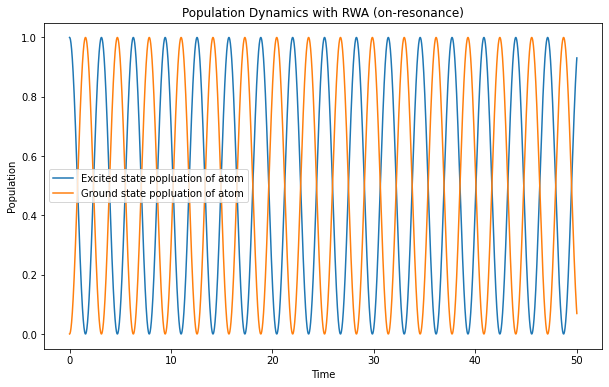

In [4]:
wc = 1.0 * 2 * np.pi
wa = 1.0 * 2 * np.pi
g = 0.01 * 2 * np.pi
N = 100
step = 5001

a = tensor(destroy(N),qeye(2))
Sigz = tensor(qeye(N),sigmaz())
Sigp = tensor(qeye(N),destroy(2))
Sigm = tensor(qeye(N),create(2))

H_JC = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp)

t_list = np.linspace(0,50.0/(g),step)    

psi0 = tensor(fock(N,0),basis(2,0))  # the initial state is a vacuum state of photon.

Exc_atom = tensor(qeye(N),fock_dm(2,0))
Grd_atom = tensor(qeye(N),fock_dm(2,1))

result0 = mesolve(H_JC,psi0,t_list,[],[Exc_atom, Grd_atom])

n_Exc = result0.expect[0]
n_Grd = result0.expect[1]

fig,axes = plt.subplots(1,1,figsize = (10,6))
axes.plot(t_list*g,n_Exc,label = 'Excited state popluation of atom')
axes.plot(t_list*g,n_Grd,label = 'Ground state popluation of atom')

axes.legend(loc = 'best')
axes.set_xlabel('Time')
axes.set_ylabel('Population')
axes.set_title('Population Dynamics with RWA (on-resonance)')

### Slightly off-resonance in the weak coupling regime
When $\omega_c \neq \omega_a$ and $|\psi(0)\rangle = |\mathrm{e},0\rangle$., we find the excited state population can not drop to zero during the Rabi oscillation cycle, and the ground state population can not reach one during the Rabi oscillation cycle.

Text(0.5, 1.0, 'Population Dynamics with RWA (off-resonance)')

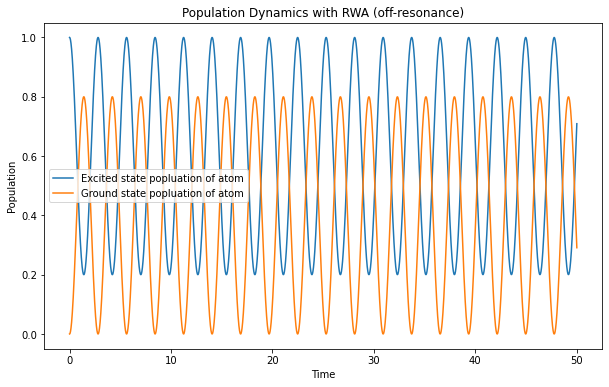

In [5]:
wc = 1.0 * 2 * np.pi
wa = 1.01 * 2 * np.pi
g = 0.01 * 2 * np.pi
N = 100
step = 5001

a = tensor(destroy(N),qeye(2))
Sigz = tensor(qeye(N),sigmaz())
Sigp = tensor(qeye(N),destroy(2))
Sigm = tensor(qeye(N),create(2))

H_JC = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp)

t_list = np.linspace(0,50.0/(g),step)    

psi0 = tensor(fock(N,0),basis(2,0))  # the initial state is a vacuum state of photon.

Exc_atom = tensor(qeye(N),fock_dm(2,0))
Grd_atom = tensor(qeye(N),fock_dm(2,1))

result0 = mesolve(H_JC,psi0,t_list,[],[Exc_atom, Grd_atom])

n_Exc = result0.expect[0]
n_Grd = result0.expect[1]

fig,axes = plt.subplots(1,1,figsize = (10,6))
axes.plot(t_list*g,n_Exc,label = 'Excited state popluation of atom')
axes.plot(t_list*g,n_Grd,label = 'Ground state popluation of atom')

axes.legend(loc = 'best')
axes.set_xlabel('Time')
axes.set_ylabel('Population')
axes.set_title('Population Dynamics with RWA (off-resonance)')

### Population Difference between Rabi Hamiltonian and Jaynes-Cummings Hamiltonian in weak coupling regime
For the localized initial state $|\psi(0)\rangle = |\mathrm{e},0\rangle$, the RWA works pretty well in both on-resonance and slightly off-reasonance conditions.

Text(0.5, 1.0, 'Population Dynamics)')

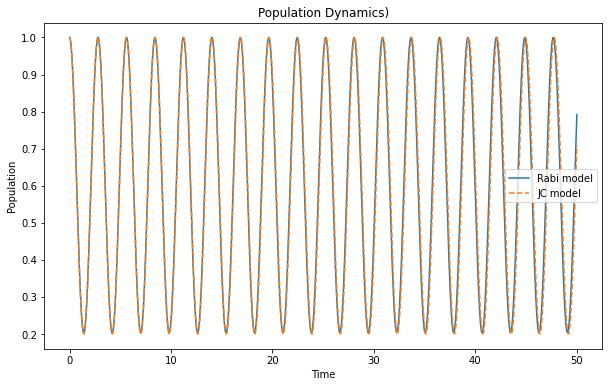

In [6]:
wc = 1.0 * 2 * np.pi
wa = 1.01 * 2 * np.pi
g = 0.01 * 2 * np.pi
N = 100
step = 5001

a = tensor(destroy(N),qeye(2))
Sigz = tensor(qeye(N),sigmaz())
Sigp = tensor(qeye(N),destroy(2))
Sigm = tensor(qeye(N),create(2))

H_Rabi = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp + a.dag() * Sigp + a * Sigm)
H_JC = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp)

t_list = np.linspace(0,50.0/(g),step)    

psi0 = tensor(fock(N,0),basis(2,0))  # the initial state is a vacuum state of photon.

Exc_atom = tensor(qeye(N),fock_dm(2,0))
Grd_atom = tensor(qeye(N),fock_dm(2,1))

result_Rabi = mesolve(H_Rabi,psi0,t_list,[],[Exc_atom, Grd_atom])
result_JC = mesolve(H_JC,psi0,t_list,[],[Exc_atom, Grd_atom])

Exc_Rabi = result_Rabi.expect[0]
Grd_Rabi = result_Rabi.expect[1]
Exc_JC = result_JC.expect[0]
Grd_JC = result_JC.expect[1]

fig,axes = plt.subplots(1,1,figsize = (10,6))
axes.plot(t_list*g,Exc_Rabi,'-',label = 'Rabi model')
axes.plot(t_list*g,Exc_JC,'--',label = 'JC model')

axes.legend(loc = 'best')
axes.set_xlabel('Time')
axes.set_ylabel('Population')
axes.set_title('Population Dynamics)')

### Expection value of $\sigma_x$, $\sigma_y$, and $\sigma_z$ between Rabi Hamiltonian and Jaynes-Cummings Hamiltonian in weak coupling regime
For an initial coherent state $ |\psi(0)\rangle = \sum_n \left[ \sqrt{\frac{\langle n\rangle^n e^{-\langle n\rangle}}{n!}} |\mathrm{g},n\rangle  \right]$, the RWA works still good in both on-resonance and slightly off-reasonance conditions.

Text(0, 0.5, 'Population')

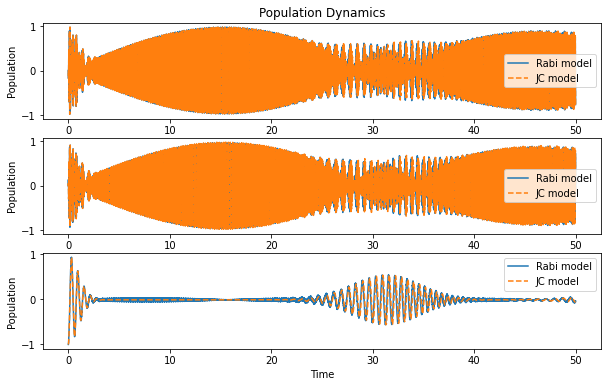

In [7]:
wc = 1.0 * 2 * np.pi
wa = 1.01 * 2 * np.pi
g = 0.01 * 2 * np.pi
N = 100
step = 5001

a = tensor(destroy(N),qeye(2))
Sigx = tensor(qeye(N),sigmax())
Sigy = tensor(qeye(N),sigmay())
Sigz = tensor(qeye(N),sigmaz())
Sigp = tensor(qeye(N),destroy(2))
Sigm = tensor(qeye(N),create(2))

H_Rabi = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp + a.dag() * Sigp + a * Sigm)
H_JC = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp)

t_list = np.linspace(0,50.0/(g),step)    

#psi0 = tensor(fock(N,0),basis(2,0))  # the initial state is a vacuum state of photon.
psi0 = tensor(coherent(N,np.sqrt(25)),basis(2,1))  # the initial state is a coherent state.

result_Rabi = mesolve(H_Rabi,psi0,t_list,[],[Sigx, Sigy, Sigz])
result_JC = mesolve(H_JC,psi0,t_list,[],[Sigx, Sigy, Sigz])

sigx_Rabi = result_Rabi.expect[0]
sigy_Rabi = result_Rabi.expect[1]
sigz_Rabi = result_Rabi.expect[2]
sigx_JC = result_JC.expect[0]
sigy_JC = result_JC.expect[1]
sigz_JC = result_JC.expect[2]

fig,axes = plt.subplots(3,1,figsize = (10,6))
axes[0].plot(t_list*g,sigx_Rabi,'-',label = 'Rabi model')
axes[0].plot(t_list*g,sigx_JC,'--',label = 'JC model')
axes[0].legend(loc = 'best')
axes[0].set_ylabel('Population')
axes[0].set_title('Population Dynamics')

axes[1].plot(t_list*g,sigy_Rabi,'-',label = 'Rabi model')
axes[1].plot(t_list*g,sigy_JC,'--',label = 'JC model')
axes[1].legend(loc = 'best')
axes[1].set_ylabel('Population')

axes[2].plot(t_list*g,sigz_Rabi,'-',label = 'Rabi model')
axes[2].plot(t_list*g,sigz_JC,'--',label = 'JC model')
axes[2].legend(loc = 'best')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Population')



### The difference between Rabi Hamiltonian and Jaynes-Cummings Hamiltonian in weak coupling regime

This is due to the relatively large detuning $|\omega_a-\omega_c|\approx 0.1\omega_a$

In [ ]:
wc = 1.0 * 2 * np.pi
wa = 1.1 * 2 * np.pi
g = 0.01 * 2 * np.pi
N = 100
step = 5001

a = tensor(destroy(N),qeye(2))
Sigx = tensor(qeye(N),sigmax())
Sigy = tensor(qeye(N),sigmay())
Sigz = tensor(qeye(N),sigmaz())
Sigp = tensor(qeye(N),destroy(2))
Sigm = tensor(qeye(N),create(2))

H_Rabi = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp + a.dag() * Sigp + a * Sigm)
H_JC = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp)

t_list = np.linspace(0,50.0/(g),step)    

#psi0 = tensor(fock(N,0),basis(2,0))  # the initial state is a vacuum state of photon.
psi0 = tensor(coherent(N,np.sqrt(25)),basis(2,0))  # the initial state is a coherent state.

result_Rabi = mesolve(H_Rabi,psi0,t_list,[],[Sigx, Sigy, Sigz])
result_JC = mesolve(H_JC,psi0,t_list,[],[Sigx, Sigy, Sigz])

sigx_Rabi = result_Rabi.expect[0]
sigy_Rabi = result_Rabi.expect[1]
sigz_Rabi = result_Rabi.expect[2]
sigx_JC = result_JC.expect[0]
sigy_JC = result_JC.expect[1]
sigz_JC = result_JC.expect[2]

fig,axes = plt.subplots(3,1,figsize = (10,6))
axes[0].plot(t_list*g,sigx_Rabi,'-',label = 'Rabi model')
axes[0].plot(t_list*g,sigx_JC,'--',label = 'JC model')
axes[0].legend(loc = 'best')
axes[0].set_ylabel('Population')
axes[0].set_title('Population Dynamics')

axes[1].plot(t_list*g,sigy_Rabi,'-',label = 'Rabi model')
axes[1].plot(t_list*g,sigy_JC,'--',label = 'JC model')
axes[1].legend(loc = 'best')
axes[1].set_ylabel('Population')

axes[2].plot(t_list*g,sigz_Rabi,'-',label = 'Rabi model')
axes[2].plot(t_list*g,sigz_JC,'--',label = 'JC model')
axes[2].legend(loc = 'best')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Population')

### The difference between Rabi Hamiltonian and Jaynes-Cummings Hamiltonian in strong coupling regime

Even under the on-reasonance condition, the difference is still obviously.

In [ ]:
wc = 1.0 * 2 * np.pi
wa = 1.0 * 2 * np.pi
g = 0.05 * 2 * np.pi
N = 200
step = 10001

a = tensor(destroy(N),qeye(2))
Sigx = tensor(qeye(N),sigmax())
Sigy = tensor(qeye(N),sigmay())
Sigz = tensor(qeye(N),sigmaz())
Sigp = tensor(qeye(N),destroy(2))
Sigm = tensor(qeye(N),create(2))

H_Rabi = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp + a.dag() * Sigp + a * Sigm)
H_JC = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp)

t_list = np.linspace(0,50.0/(g),step)    

#psi0 = tensor(fock(N,0),basis(2,0))  # the initial state is a vacuum state of photon.
psi0 = tensor(coherent(N,np.sqrt(25)),basis(2,0))  # the initial state is a coherent state.

result_Rabi = mesolve(H_Rabi,psi0,t_list,[],[Sigx, Sigy, Sigz])
result_JC = mesolve(H_JC,psi0,t_list,[],[Sigx, Sigy, Sigz])

sigx_Rabi = result_Rabi.expect[0]
sigy_Rabi = result_Rabi.expect[1]
sigz_Rabi = result_Rabi.expect[2]
sigx_JC = result_JC.expect[0]
sigy_JC = result_JC.expect[1]
sigz_JC = result_JC.expect[2]

fig,axes = plt.subplots(3,1,figsize = (10,6))
axes[0].plot(t_list*g,sigx_Rabi,'-',label = 'Rabi model')
axes[0].plot(t_list*g,sigx_JC,'--',label = 'JC model')
axes[0].legend(loc = 'best')
axes[0].set_ylabel('Population')
axes[0].set_title('Population Dynamics')

axes[1].plot(t_list*g,sigy_Rabi,'-',label = 'Rabi model')
axes[1].plot(t_list*g,sigy_JC,'--',label = 'JC model')
axes[1].legend(loc = 'best')
axes[1].set_ylabel('Population')

axes[2].plot(t_list*g,sigz_Rabi,'-',label = 'Rabi model')
axes[2].plot(t_list*g,sigz_JC,'--',label = 'JC model')
axes[2].legend(loc = 'best')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Population')

### References:
1. J. R. Johansson, P.D. Nation, and F. Nori, “QuTiP 2: A Python framework for the dynamics of open quantum systems”, Comp. Phys. Comm. 184, 1234 (2013).

### Add-on: Bloch sphere

In [ ]:
import matplotlib as mpl
from matplotlib import cm

b=Bloch()
nrm = mpl.colors.Normalize(-2,12)
colors=cm.jet(nrm(t_list))
b.add_points([sigx_Rabi,sigy_Rabi,sigz_Rabi],'m')

b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[5]
b.view=[-30,20]
b.zlpos=[1.1,-1.2]
b.show()

In [ ]:
import matplotlib as mpl
from matplotlib import cm

b=Bloch()
nrm = mpl.colors.Normalize(-2,12)
colors=cm.jet(nrm(t_list))
b.add_points([sigx_JC,sigy_JC,sigz_JC],'m')

b.point_color=list(colors)
b.point_marker=['o']
b.point_size=[5]
b.view=[-30,20]
b.zlpos=[1.1,-1.2]
b.show()